In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from data_reconstruct import *
from data_reconstruct.backend import *
from data_reconstruct.utilities import *

In [3]:
np.random.seed(42)

# Read Data

In [4]:
mod1 = pd.read_csv('data/decennial_2020_stateabbrevs.csv')[1:]
mod2 = pd.read_csv('data/public_150k_plus_210630.csv')
mod1_back, mod2_back = mod1, mod2

In [5]:
mod1, mod2 = mod1_back, mod2_back

In [6]:
# TODO: Add locations
mod1_cols = [
    'totalpop_white', 'totalpop_black', 'totalpop_amindian',
    'totalpop_asian', 'totalpop_pacisland', 'totalpop_other',
    'totalpop_twomoreraces', 'totalpop_tworaces', 'totalpop_whiteblack',
    'totalpop_whiteamindian', 'totalpop_whiteasian', 'totalpop_whitepacisland',
    'totalpop_whiteother', 'totalpop_blackamindian', 'totalpop_blackasian',
    'totalpop_blackpacislander', 'totalpop_blackother', 'totalpop_amindianasian',
    'totalpop_amindianpacislander', 'totalpop_amindianother',
    'totalpop_asianpacislander', 'totalpop_asianother',
    'totalpop_pacislanderother', 'totalpop_threeraces'
]
mod1_total_col = ['totalpop']
mod1_tags_cols = ['st_abbreviation']

mod1 = mod1[mod1_tags_cols + mod1_total_col + mod1_cols]
mod1 = mod1.astype({col: 'int32' for col in mod1_cols + mod1_total_col})
mod1[mod1_cols] = (mod1[mod1_cols] / mod1[mod1_total_col].values[:])
mod1.head()

,st_abbreviation,totalpop,totalpop_white,totalpop_black,totalpop_amindian,totalpop_asian,totalpop_pacisland,totalpop_other,totalpop_twomoreraces,totalpop_tworaces,...,totalpop_blackasian,totalpop_blackpacislander,totalpop_blackother,totalpop_amindianasian,totalpop_amindianpacislander,totalpop_amindianother,totalpop_asianpacislander,totalpop_asianother,totalpop_pacislanderother,totalpop_threeraces
1,AL,55648,0.757619,0.205668,0.003900,0.015832,0.000629,0.016353,0.056732,0.053533,...,0.000970,0.000359,0.001006,0.000180,0.000000,0.000144,0.000054,0.000252,0.000090,0.003019
2,AL,216743,0.873841,0.084049,0.007299,0.009537,0.000660,0.024614,0.069317,0.066374,...,0.000360,0.000037,0.000770,0.000032,0.000014,0.000111,0.000106,0.000088,0.000000,0.002768
3,AL,24523,0.461485,0.486604,0.004730,0.004771,0.000041,0.042368,0.028545,0.026995,...,0.000000,0.000245,0.001550,0.000122,0.000000,0.000000,0.000122,0.000041,0.000000,0.001142
4,AL,21534,0.768784,0.204932,0.002786,0.001486,0.000418,0.021594,0.035247,0.032507,...,0.000186,0.000046,0.000000,0.000000,0.000000,0.000279,0.000186,0.000000,0.000046,0.002275
5,AL,55478,0.913209,0.015231,0.006074,0.003208,0.000433,0.061844,0.065900,0.063521,...,0.000054,0.000000,0.000361,0.000072,0.000000,0.000523,0.000000,0.000036,0.000090,0.001965


In [7]:
# TODO: Add locations
# TODO: Filter by date?
mod2_cols = [
    # 'LoanStatus', 'Term',
    # 'SBAGuarantyPercentage', 'InitialApprovalAmount',
    # 'CurrentApprovalAmount', 'UndisbursedAmount', 
    # Include above
    # Need to look at below
    'RuralUrbanIndicator', 'HubzoneIndicator',
    'LMIIndicator', 'BusinessAgeDescription', 'ProjectCity',
    'ProjectCountyName', 'ProjectState', 'ProjectZip', 'CD', 'JobsReported',
    'NAICSCode', 'Race', 'Ethnicity', 'UTILITIES_PROCEED',
    'PAYROLL_PROCEED', 'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',
    'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
    'DEBT_INTEREST_PROCEED', 'BusinessType', 'OriginatingLenderLocationID',
    'OriginatingLender', 'OriginatingLenderCity', 'OriginatingLenderState',
    'Gender', 'Veteran', 'NonProfit', 'ForgivenessAmount',
    'ForgivenessDate',
]
mod2_cols = ['CurrentApprovalAmount', 'ForgivenessAmount']
mod2_tags_cols = ['OriginatingLenderState']

# Remove missing
mod2 = mod2[mod2_tags_cols + mod2_cols]
mod2 = mod2.dropna()

mod2 = mod2.astype({col: 'int32' for col in mod2_cols})
mod2.head()

,OriginatingLenderState,CurrentApprovalAmount,ForgivenessAmount
0,GA,769358,773553
2,NC,691355,696677
4,OH,367437,370819
5,OH,328840,332137
6,GA,289765,291741


In [8]:
mod1 = mod1.groupby('st_abbreviation').mean()
merged = mod1.merge(mod2, left_on='st_abbreviation', right_on='OriginatingLenderState', how='left')
mod1 = merged[mod1_cols]
mod2 = merged[mod2_cols]
annotations = merged[['OriginatingLenderState']]

In [9]:
normalize = lambda df: (df - df.min()) / (df.max() - df.min())
mod2 = mod2.apply(lambda df: np.log(1 + df)).apply(normalize)

In [10]:
num_samples = 2000
random_state = 42
mod1_sample = mod1.sample(num_samples, random_state=random_state)
mod2_sample = mod2.sample(num_samples, random_state=random_state)
annotations_sample = annotations.sample(num_samples, random_state=random_state);

# Realistic Implementation

In [11]:
split_idx = int(.8 * len(mod2_sample))
pipeline_output = run_pipeline(
    mod1_sample.to_numpy(),
    mod2_sample.to_numpy(),
    train_idx=split_idx,
)

use random seed: 666
Shape of Raw data
Dataset 0: (2000, 24)
Dataset 1: (1600, 2)
---------------------------------
Find correspondence between Dataset 1 and Dataset 2
use device: cpu
epoch:[200/2000] err:0.3897 alpha:0.2082
epoch:[400/2000] err:0.0070 alpha:0.0037
epoch:[600/2000] err:0.0001 alpha:0.0001
epoch:[800/2000] err:0.0000 alpha:0.0000
epoch:[1000/2000] err:0.0021 alpha:0.0011
epoch:[1200/2000] err:0.0070 alpha:0.0037
epoch:[1400/2000] err:0.0131 alpha:0.0070
epoch:[1600/2000] err:0.0195 alpha:0.0104
epoch:[1800/2000] err:0.0257 alpha:0.0137
epoch:[2000/2000] err:0.0314 alpha:0.0168
Finished Matching!
---------------------------------
Begin finding the embedded space
epoch:[50/100]: loss:2.372605, align_loss:0.552928
epoch:[100/100]: loss:2.782003, align_loss:0.558530
Done
---------------------------------
unionCom Done!
time: 40.27527332305908 seconds
---------------------------------
Mapping to last dataset...
Epoch:  50    Loss:  0.03446
Epoch: 100    Loss:  0.03446
Valida

# Evaluate Results

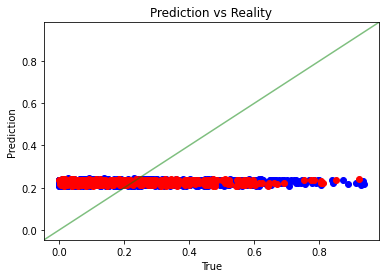

In [12]:
plot_example_results(mod2_sample.iloc[:, :1], pipeline_output, split_idx)